In [20]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score


%matplotlib inline

In [21]:
df = pd.read_excel('./new_distance_and_inctype_v2.xlsx')
df = df[df.incidenType != 'Demand']
df.head()

,Incident_Number,clus0,clus1,clus2,clus3,clus4,clus5,clus6,clus7,clus8,...,clus11,clus12,clus13,clus14,clus15,clus16,clus17,clus18,clus19,incidenType
0,INC000001519273,1.021816,1.072850,1.279533,1.387559,1.032203,1.380312,1.384832,0.975785,1.285788,...,1.011147,0.998272,1.054176,1.024156,1.035649,1.066760,1.052430,1.073079,1.065592,Request
1,INC000001519276,1.019920,1.066228,1.279609,1.366732,1.023912,1.380312,1.362766,1.015242,1.285788,...,0.995653,0.999006,1.020951,1.006140,1.034362,1.057150,1.037852,1.075064,1.054566,Incident
2,INC000001519283,1.013021,1.066665,1.204334,1.369795,1.021968,1.360126,1.366013,1.004825,1.285788,...,0.997121,0.993738,1.040456,1.006521,0.910314,1.051659,1.037188,1.068665,1.050866,Incident
3,INC000001519299,1.007513,1.050546,1.240233,1.387559,1.011451,1.380312,1.384832,0.998203,1.285636,...,0.968797,0.990509,0.918338,0.994454,0.980878,1.022897,0.985670,1.060815,0.938210,Incident
4,INC000001520136,1.023411,1.073342,1.276957,1.367240,1.033154,1.380312,1.363305,1.024950,1.285788,...,1.010468,0.999318,1.063505,1.023985,1.032681,1.068123,1.052386,1.026300,1.069464,Request


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df[
                    ['clus0',
                      'clus1',
                      'clus2',
                      'clus3',
                      'clus4',
                      'clus5',
                      'clus6',
                      'clus7',
                      'clus8',
                      'clus9',
                      'clus10',
                      'clus11',
                      'clus12',
                      'clus13',
                      'clus14',
                      'clus15',
                      'clus16',
                      'clus17',
                      'clus18',
                      'clus19']
                                ],df.incidenType,train_size=0.8)


In [23]:
(y_test.value_counts() / len(y_test))


Request     0.731433
Incident    0.268567
Name: incidenType, dtype: float64

In [24]:
model = LogisticRegression(solver='liblinear')


In [25]:
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [26]:
y_predicted = model.predict(X_test)


In [27]:
y_pred_proba = model.predict_proba(X_test)


In [28]:
score = model.score(X_test,y_test)
score_percent = score * 100
print('Точность модели: {score_percent:.2f}%'.format(score_percent=score_percent))

Точность модели: 77.12%


In [29]:
y_predicted[:100]


array(['Request', 'Request', 'Request', 'Request', 'Request', 'Incident',
       'Request', 'Incident', 'Request', 'Request', 'Request', 'Request',
       'Request', 'Request', 'Incident', 'Request', 'Request', 'Request',
       'Request', 'Request', 'Request', 'Request', 'Request', 'Request',
       'Incident', 'Request', 'Request', 'Incident', 'Request', 'Request',
       'Request', 'Request', 'Request', 'Request', 'Request', 'Request',
       'Request', 'Request', 'Request', 'Request', 'Request', 'Request',
       'Request', 'Request', 'Request', 'Request', 'Request', 'Request',
       'Incident', 'Request', 'Incident', 'Request', 'Request', 'Request',
       'Incident', 'Request', 'Request', 'Request', 'Request', 'Request',
       'Request', 'Request', 'Request', 'Request', 'Request', 'Request',
       'Request', 'Request', 'Request', 'Request', 'Request', 'Request',
       'Request', 'Request', 'Request', 'Request', 'Request', 'Request',
       'Request', 'Request', 'Request', 'Re

Text(0.5, 257.44, 'Predicted label')

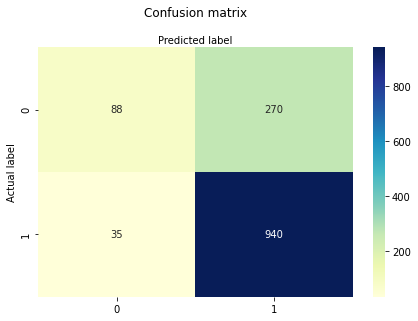

In [30]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predicted)
class_names=['Incident', 'Request'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')